<a href="https://colab.research.google.com/github/data-aleks/Allrecipes_tidy_tusday_16092025/blob/main/Allrecipes_tidy_tuesday_16_09_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load neccesary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import date

#**Allrecipes - TidyTuesday - 16.09.2026**

**Project Description**

This week we're exploring a curated collection of recipes collected from Allrecipes.com! The data this week comes from the tastyR package (a dataset assembled from Allrecipes.com) and was prepared for analysis in R. Fields have been cleaned and standardized where possible to make comparisons and visual exploration straightforward.

A collection of recipe datasets scraped from https://www.allrecipes.com/, containing two complementary datasets: allrecipes with 14,426 general recipes, and cuisines with 2,218 recipes categorized by country of origin. Both datasets include comprehensive recipe information such as ingredients, nutritional facts (calories, fat, carbs, protein), cooking times (preparation and cooking), ratings, and review metadata. All data has been cleaned and standardized, ready for analysis.

Thank you to [Brian Mubia](https://github.com/owlzyseyes) for curating this week's dataset.

**Project Structure**
*   **Executive Summary**
*   **Data Sources**
*   **Project Goals**
*   **Step 1.** Loading
    * Loading datasets
*   **Step 2.** Exploring
    * Important functions
    * 2.1 Data Summary
    * 2.2 Sample Rows
    * 2.3 Missing Data
    * 2.4 Column Properties
    * 2.5 Column Distribution
    * 2.6 Multivariate Correlation Matrix
*   **Step 3.** Cleaning
    * 3.1 Identify grain, measures and dimensions
    * 3.2 Identify critical and non critical columns
    * 3.3 Identify solvable and non solvable data issues.
*   **Step 4.** Export



**Executive Summary**

The purpose of this notebook is to prepare the data for export in to power bi for further analysis. After reviewing data the final exported dataset for all_recipes has data loss of 3.91%, while cuisines data has data loss of:  0.58%.This is due to missing values being removed from the data. After exploring the dataset we have established a that there is a correlation in coloric content of recepies, and a negative correlation between caloric content and number of servings.

**Data sources used in the project**

- [Allrecipes](https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-16/all_recipes.csv)
- [Cuisines](https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-16/cuisines.csv)

**Project goals**

The goal of this project is to continue working with various data sources, while previously i aimed at **answering questions** stated in [TidyTuesday challenge](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-09-16/readme.md), this time around i will come up with my own questions to answer using this data.


**Answer Questions:**
- How does the average fast food breakfast compare to a healthy homemade diet? A nutritional breakdown.

## **Step 1.** Loading data

Loading data sources in to pandas. Ensuring data is loaded succesfully before moving to the next step.

In [2]:
# Loading data in to pandas
df_all_recipes = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-16/all_recipes.csv')

In [3]:
# Error handling if unable to load data
if df_all_recipes.empty:
  print('Unable to load [Data Name]')
else:
  print('[Data Name] loaded succesfully.')

[Data Name] loaded succesfully.


In [4]:
# Store DataFrames and their names in a list of tuples
data_to_explore = [
    (df_all_recipes, 'Data containing recipes'),
]

## **Step 2.** Exploring data

### **Important Functions**

**Data Exploration Functions**

These functions are created to help with **Explore** steps.

In [5]:
# Example usage
# # Loop through the list and apply the function
# for df, name in data_to_explore:
#     display_summary_stats(df, name)

**Data Summary**

In [6]:
def display_summary_stats(df, df_name):
    """
    Prints a concise summary of the DataFrame and visualizes descriptive
    statistics using a heatmap.
    """
    print(f"\n--- EXPLORATORY ANALYSIS FOR '{df_name}' ---")
    print("=" * 50)

    # 1. Concise Data Summary
    print("## Data Summary (df.info() & df.describe())")

    # Text-based summary
    print("\n--- DataFrame Info ---")
    df.info()

    # Visualization of Descriptive Statistics
    print("\n--- Descriptive Statistics Heatmap ---")
    numeric_df = df.select_dtypes(include=np.number)

    if not numeric_df.empty:
        # Calculate descriptive statistics for numerical columns
        desc_stats = numeric_df.describe()

        # Create a heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(desc_stats, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
        plt.title(f'Descriptive Statistics Heatmap for "{df_name}"')
        plt.show()
    else:
        print("No numerical data to describe or visualize.")

    print(f"\n--- End of summary stats for '{df_name}' ---")

**Sample Rows**

In [7]:
def display_sample_rows(df, df_name):
    """Prints the first and last few rows of the DataFrame."""
    print(f"\n--- EXPLORATORY ANALYSIS FOR '{df_name}' ---")
    print("=" * 50)
    print("\n## Sample Rows (df.head() & df.tail())")
    print("--- First 5 Rows ---")
    print(df.head())
    print("\n--- Last 5 Rows ---")
    print(df.tail())

**Missing Values**

In [8]:
def display_missing_values(df, df_name):
    """
    Visualizes missing values using a grid of pie charts.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        df_name (str): The name of the DataFrame for the title.
    """
    print(f"\n--- EXPLORATORY ANALYSIS FOR '{df_name}' ---")
    print("=" * 50)
    print("\n## Missing Values")

    missing_values = df.isna().sum()
    columns_with_missing_data = missing_values[missing_values > 0]

    if not columns_with_missing_data.empty:
        print("Pie charts below show the percentage and count of missing values for each column.")

        n_plots = len(columns_with_missing_data)
        n_rows = math.ceil(n_plots / 3)

        # Create a subplot grid with 3 plots per row
        fig, axes = plt.subplots(n_rows, 3, figsize=(7.5, 2.5 * n_rows))

        # Ensure 'axes' is always a NumPy array for consistent iteration
        if isinstance(axes, plt.Axes):
            axes = np.array([axes])
        else:
            axes = axes.flatten()

        for i, (col, count) in enumerate(columns_with_missing_data.items()):
            valid_count = len(df) - count

            # Updated labels to include the raw counts
            labels = [f'Missing ({count})', f'Valid ({valid_count})']
            sizes = [count, valid_count]
            colors = ['#FF9999', '#66B2FF']

            ax = axes[i]
            ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
            ax.axis('equal')  # Ensures the pie is drawn as a circle
            ax.set_title(f'"{col}"')

        # Hide any unused subplots
        for i in range(n_plots, len(axes)):
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

    else:
        print("No missing values found.")

**Column Properties**

In [9]:
def get_dtype_group(dtype):
    """Categorizes pandas data types into broader groups for visualization."""
    if pd.api.types.is_numeric_dtype(dtype):
        return 'Numerical'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'Date/Time'
    elif pd.api.types.is_timedelta64_dtype(dtype):
        return 'Time Delta'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'Boolean'
    elif isinstance(dtype, pd.CategoricalDtype):
        return 'Categorical'
    elif pd.api.types.is_string_dtype(dtype):
        return 'String'
    else:
        return 'Other'

def display_column_properties(df, df_name):
    """
    Visualizes column properties including uniqueness and value distributions.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        df_name (str): The name of the DataFrame for the title.
    """
    print(f"\n--- EXPLORATORY ANALYSIS FOR '{df_name}' ---")
    print("=" * 50)
    print("\n## Value Counts & Uniqueness (Visualized)")

    # Create a DataFrame to hold the necessary data for visualization
    column_properties = pd.DataFrame({
        'Column': df.columns,
        'Unique Values': [df[col].nunique() for col in df.columns],
        'Total Values': len(df)
    })

    column_properties['Repeated Values'] = column_properties['Total Values'] - column_properties['Unique Values']

    # Set up the stacked bar chart
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the total values (as the base)
    ax.bar(column_properties['Column'], column_properties['Total Values'], color='#66B2FF', label='Repeated Values')

    # Plot the unique values on top of the repeated values
    ax.bar(column_properties['Column'], column_properties['Unique Values'], color='#FF9999', label='Unique Values')

    # Add labels and a title
    ax.set_title(f'Column Value Counts and Uniqueness in "{df_name}"')
    ax.set_xlabel('Column')
    ax.set_ylabel('Count')
    ax.set_xticks(range(len(column_properties['Column'])))
    ax.set_xticklabels(column_properties['Column'], rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

**Data Distributioin**

In [10]:
def display_data_distribution(df, df_name):
    """Creates and displays visualizations for numerical and categorical data."""
    print(f"\n--- EXPLORATORY ANALYSIS FOR '{df_name}' ---")
    print("=" * 50)
    print("\n## Data Distribution Visualizations")
    print("A **data distribution** describes how data points are spread across a range of values.\n"
          "Visualizing this is incredibly useful for understanding patterns, identifying outliers, and seeing where the majority of your data lies.\n"
          "For example, a bell-shaped curve indicates a normal distribution, while a skewed distribution might suggest a particular trend or unusual data points.\n"
          "These plots help you quickly spot insights and potential data quality issues that summary statistics alone might miss.")

    numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique() > 20]
    categorical_cols = [col for col in df.columns if df[col].nunique() < 20 and df[col].dtype == 'object']
    all_viz_cols = numeric_cols + categorical_cols

    if all_viz_cols:
        n_plots = len(all_viz_cols)
        n_rows = math.ceil(n_plots / 3)
        fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

        if n_rows > 1:
            axes = axes.flatten()

        for i, col in enumerate(all_viz_cols):
            ax = axes[i]

            if col in numeric_cols:
                sns.histplot(df[col].dropna(), kde=True, ax=ax)
                ax.set_title(f'Distribution of {col}')
                ax.set_xlabel(col)
                ax.set_ylabel('Frequency')

            elif col in categorical_cols:
                df[col].value_counts().plot(kind='bar', ax=ax)
                ax.set_title(f'Value Counts for {col}')
                ax.set_xlabel(col)
                ax.set_ylabel('Count')

        for i in range(n_plots, len(axes)):
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("No suitable columns for visualization.")

    print("\n" + "=" * 50)
    print(f"--- END OF ANALYSIS FOR '{df_name}' ---")

**Data Exploration Error Handling**:

The purpose of this function is to ensure that data is there to explore before executing subsequent explore functions.

In [11]:
# Example usage
# run_data_exploration(data_to_explore, display_summary_stats)

In [12]:
def run_data_exploration(data_to_explore, exploration_func):
    """
    Runs a specified exploratory data analysis function on a list of
    DataFrames, with built-in validation checks.

    Args:
        data_to_explore (list): A list of tuples, where each tuple contains
                                a pandas DataFrame and its name (df, df_name).
        exploration_func (function): The function to execute for each valid
                                     DataFrame (e.g., display_summary_stats).
    """
    if not data_to_explore:
        print('No data added to data to explore.')
        return

    for item in data_to_explore:
        # Check for invalid item format
        if not isinstance(item, tuple) or len(item) != 2:
            print(f"Skipping invalid item in list: {item}. Each item must be a tuple of (DataFrame, name).")
            continue

        df, name = item

        # Validate DataFrame object and its content
        if not isinstance(df, pd.DataFrame):
            print(f"Skipping '{name}': Not a pandas DataFrame.")
            continue

        if df.empty:
            print(f"Skipping '{name}': The DataFrame is empty.")
            continue

        # If all checks pass, run the specified function
        exploration_func(df, name)

Exploring data to see what we are working with, what cleaning steps we will need to undertake.

**Log correlation heatmap**

In [13]:
def create_log_transformed_heatmaps(df, df_name):
    """
    Takes a list of tuples, where each tuple contains a DataFrame and its label.
    It removes all non-numeric columns, applies a log-plus-one transformation
    to the remaining columns, calculates the correlation matrix, and plots a heatmap.

    Args:
        list_of_tuples (list): A list of tuples, e.g., [(df1, 'Label 1'), (df2, 'Label 2')].

    Returns:
        None
    """
    # Select only the numerical columns, effectively removing all others.
    df_numerical = df.select_dtypes(include=[np.number])

    # Apply the log-plus-one transformation to the numerical DataFrame.
    df_transformed = np.log(df_numerical + 1)

    # Now, calculate the correlation matrix on the transformed data.
    multivariate_corr_log = df_transformed.corr()

    # Plot the heatmap for the current DataFrame.
    plt.figure(figsize=(12, 7))
    sns.heatmap(multivariate_corr_log, annot=True, vmin=-1, vmax=1, cmap="viridis")
    plt.title(f"Log-Transformed Correlation Heatmap - {df_name}")
    plt.show()

### **2.1 Data Summary**

Summary for each dataset in added to data_to_explore.


--- EXPLORATORY ANALYSIS FOR 'Data containing recipes' ---
## Data Summary (df.info() & df.describe())

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14426 entries, 0 to 14425
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            14426 non-null  object 
 1   url             14426 non-null  object 
 2   author          14426 non-null  object 
 3   date_published  14426 non-null  object 
 4   ingredients     14417 non-null  object 
 5   calories        14226 non-null  float64
 6   fat             14070 non-null  float64
 7   carbs           14212 non-null  float64
 8   protein         14178 non-null  float64
 9   avg_rating      13454 non-null  float64
 10  total_ratings   13454 non-null  float64
 11  reviews         13353 non-null  float64
 12  prep_time       14426 non-null  int64  
 13  cook_time       14426 non-null  int64  
 14  total_time      14426 non-null  int64 

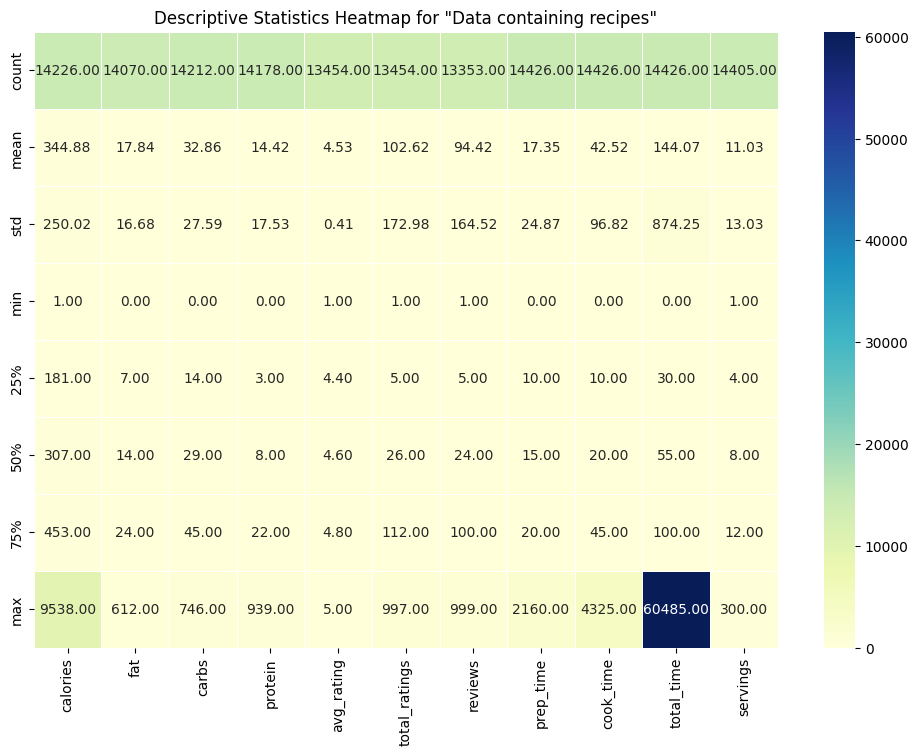


--- End of summary stats for 'Data containing recipes' ---


In [14]:
run_data_exploration(data_to_explore, display_summary_stats)

### **2.2 Sample Rows**

In [15]:
run_data_exploration(data_to_explore, display_sample_rows)


--- EXPLORATORY ANALYSIS FOR 'Data containing recipes' ---

## Sample Rows (df.head() & df.tail())
--- First 5 Rows ---
                                       name  \
0  Chewy Whole Wheat Peanut Butter Brownies   
1                        Pumpkin Pie Eggnog   
2              Eggs Poached in Tomato Sauce   
3                      Minestrone Casserole   
4                     Yummy Stuffed Peppers   

                                                 url         author  \
0  https://www.allrecipes.com/recipe/140717/chewy...         DMOMMY   
1  https://www.allrecipes.com/recipe/269204/pumpk...   Bobbie Susan   
2  https://www.allrecipes.com/recipe/238054/eggs-...           Bren   
3  https://www.allrecipes.com/minestrone-casserol...   Sarah Brekke   
4  https://www.allrecipes.com/recipe/241937/yummy...  Procrastigirl   

  date_published                                        ingredients  calories  \
0     2020-06-18  ⅓ cup margarine, softened, ⅔ cup white sugar, ...     222.0   
1     2

### **2.3 Missing Data**


--- EXPLORATORY ANALYSIS FOR 'Data containing recipes' ---

## Missing Values
Pie charts below show the percentage and count of missing values for each column.


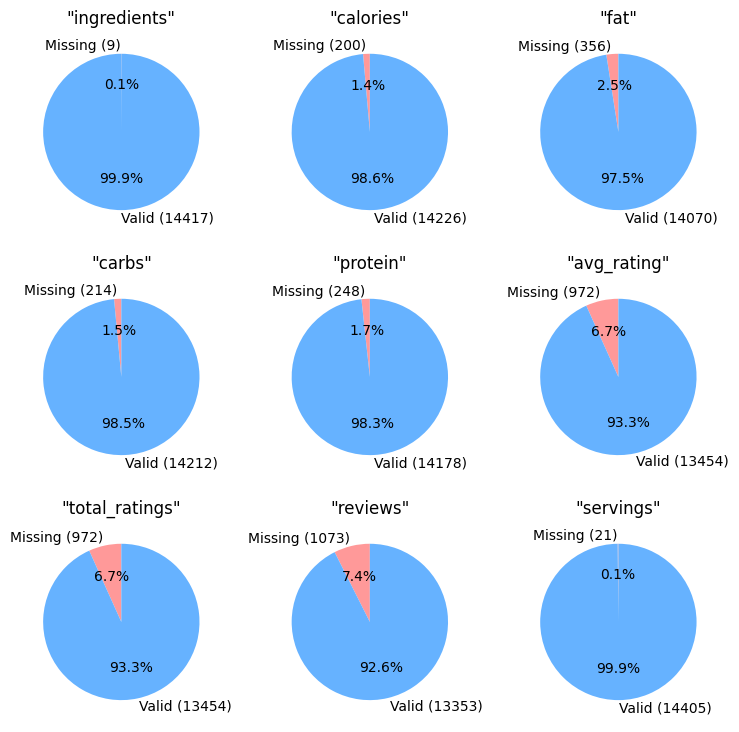

In [16]:
run_data_exploration(data_to_explore, display_missing_values)

### **2.4 Column Properties**


--- EXPLORATORY ANALYSIS FOR 'Data containing recipes' ---

## Value Counts & Uniqueness (Visualized)


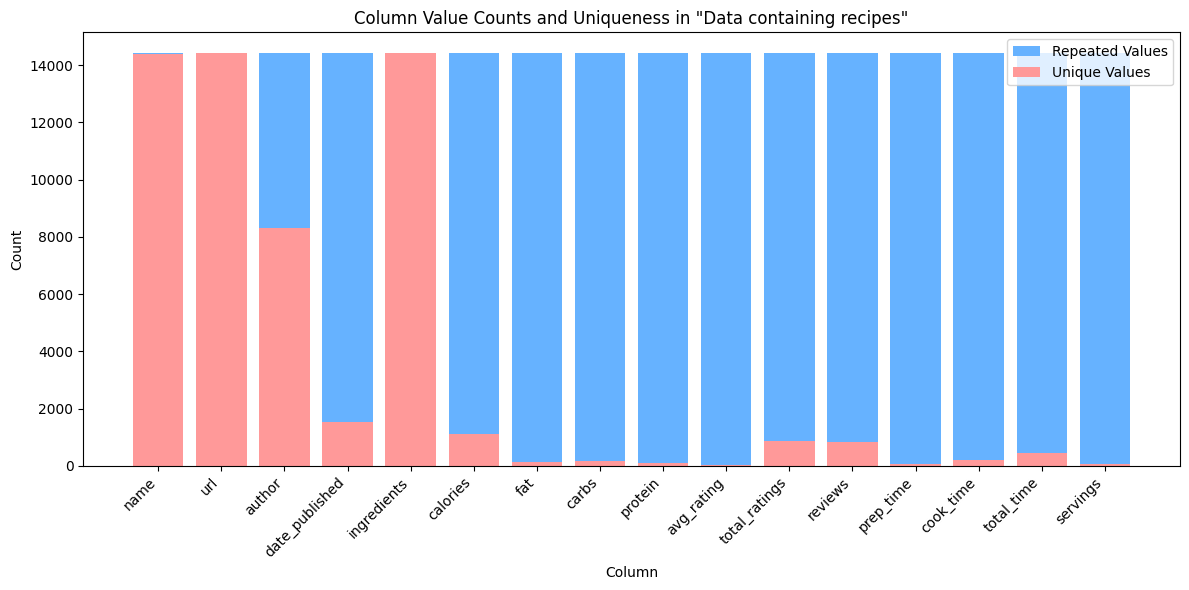

In [17]:
run_data_exploration(data_to_explore, display_column_properties)

### **2.5 Data Distribution**


--- EXPLORATORY ANALYSIS FOR 'Data containing recipes' ---

## Data Distribution Visualizations
A **data distribution** describes how data points are spread across a range of values.
Visualizing this is incredibly useful for understanding patterns, identifying outliers, and seeing where the majority of your data lies.
For example, a bell-shaped curve indicates a normal distribution, while a skewed distribution might suggest a particular trend or unusual data points.
These plots help you quickly spot insights and potential data quality issues that summary statistics alone might miss.


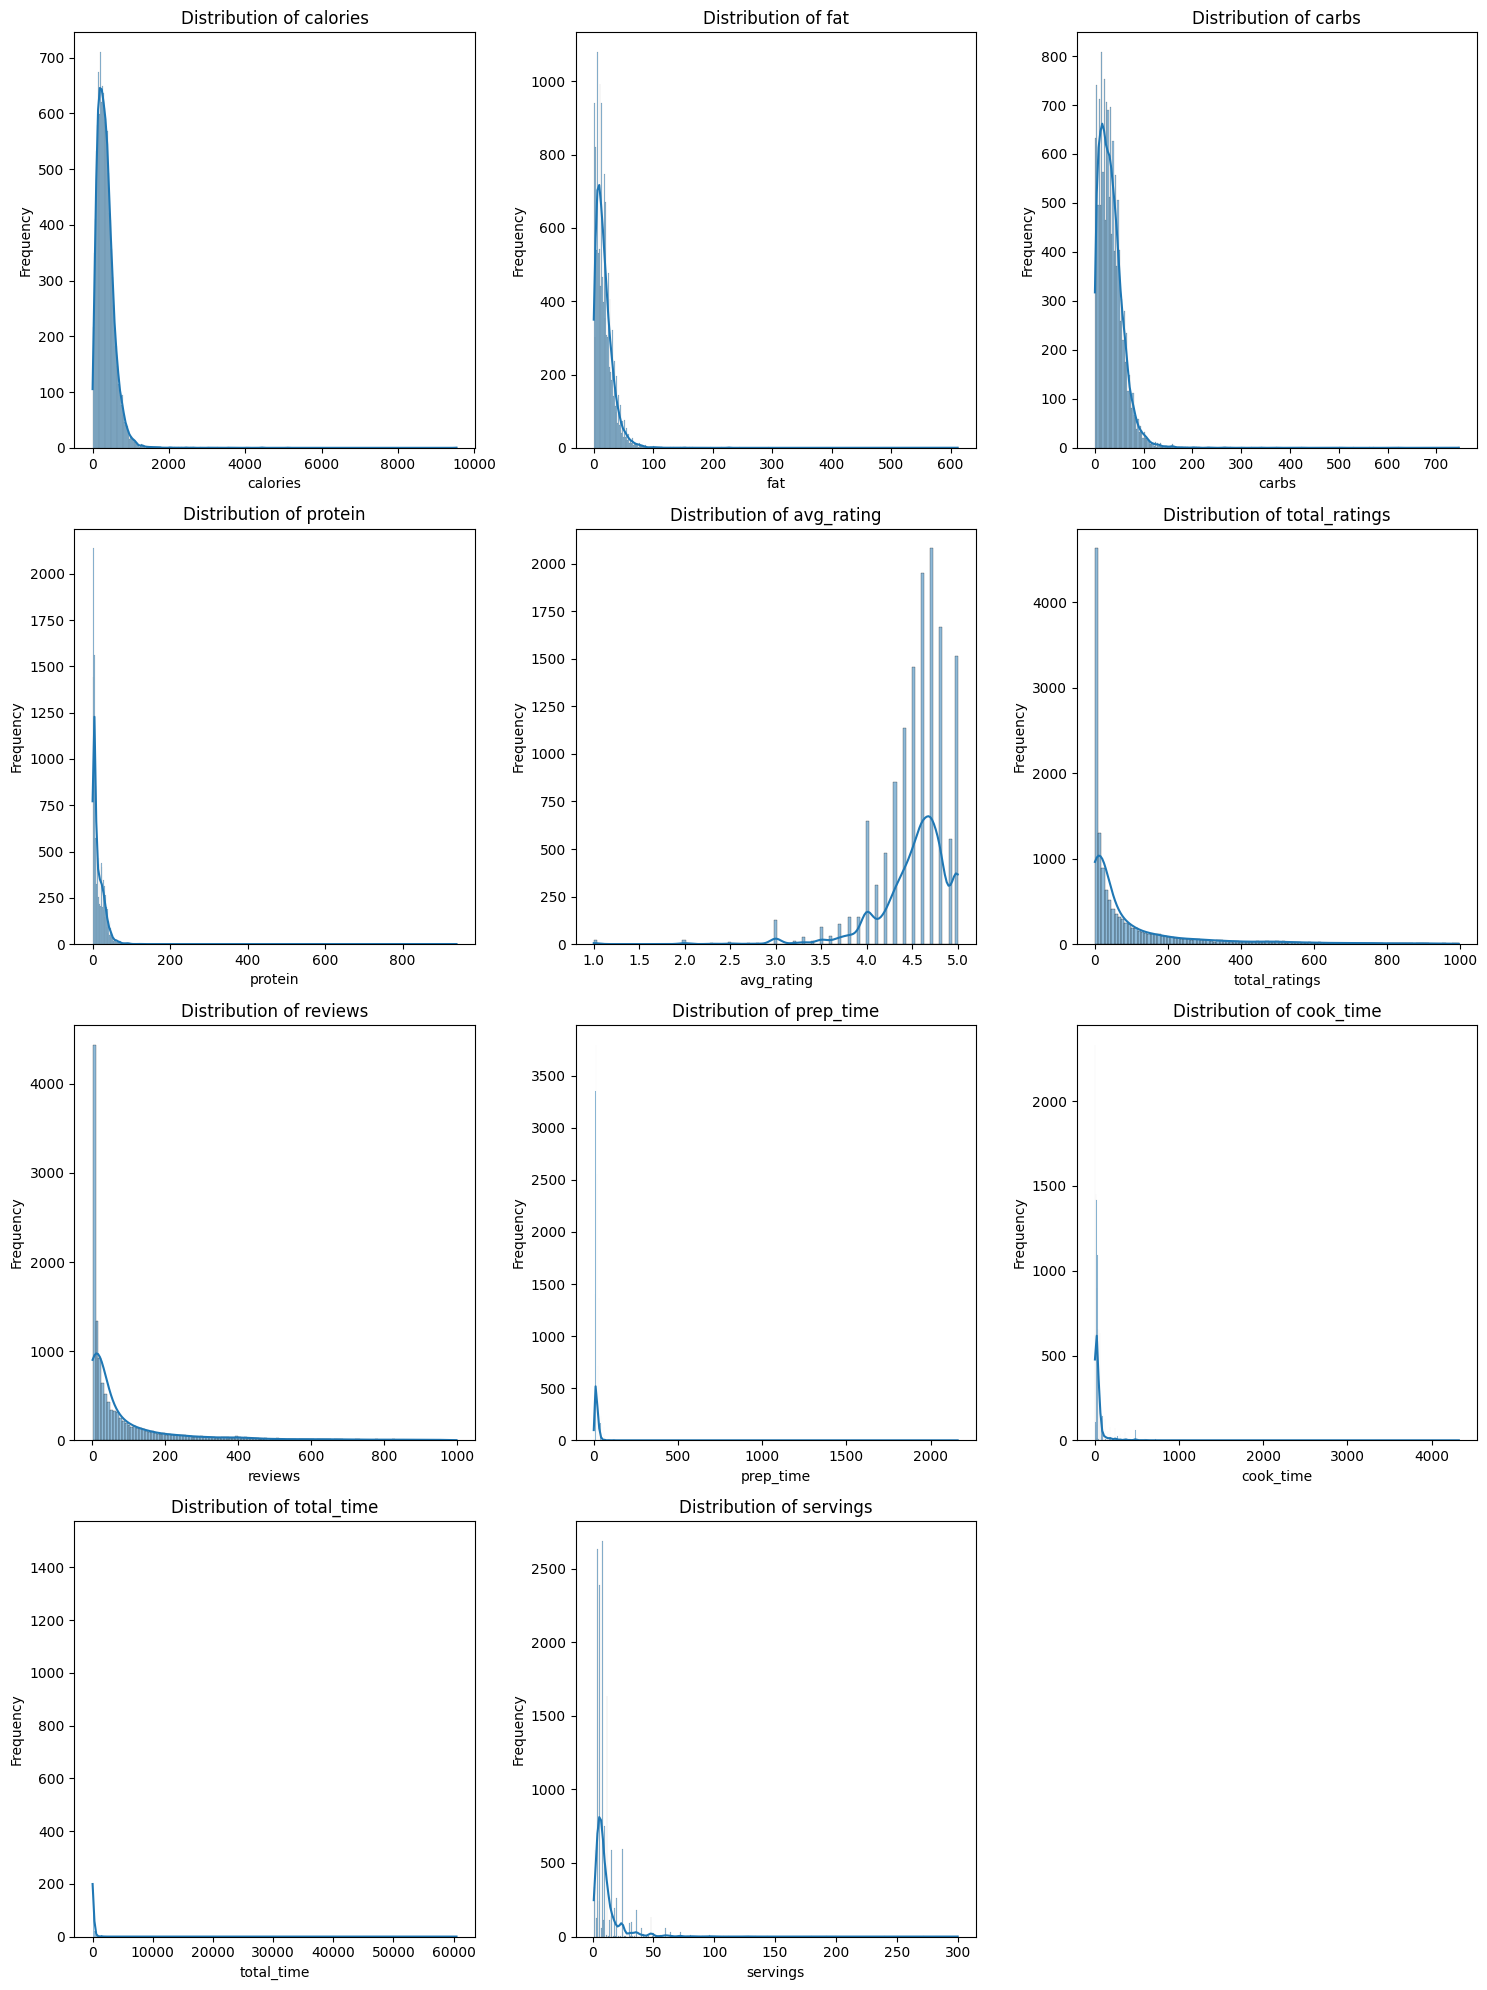


--- END OF ANALYSIS FOR 'Data containing recipes' ---


In [18]:
run_data_exploration(data_to_explore, display_data_distribution)

### **2.6 Multivariate Correlation**

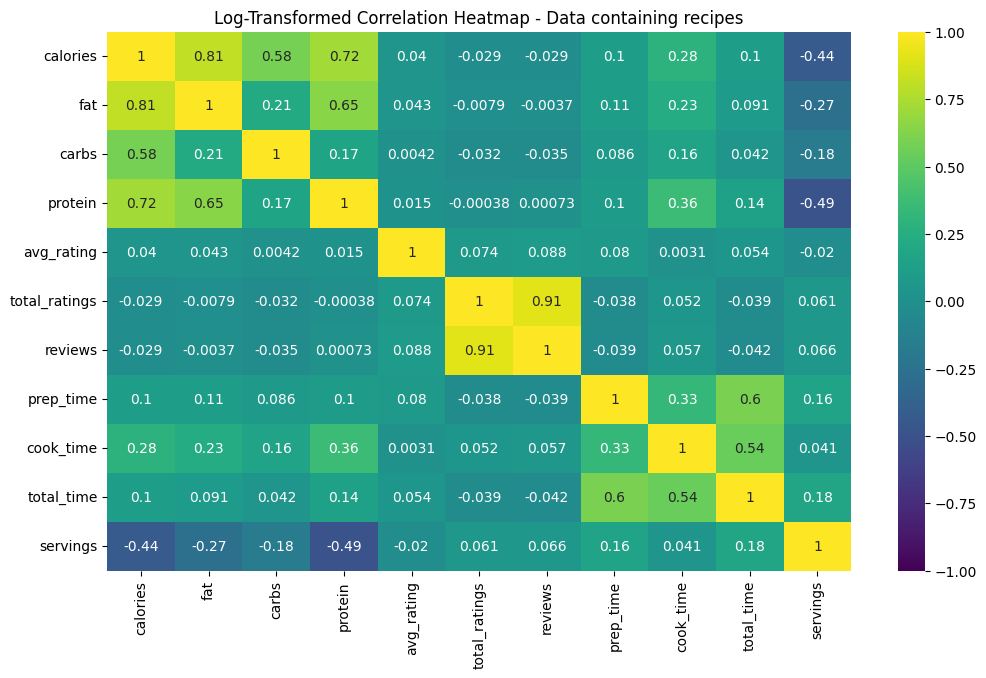

In [19]:
run_data_exploration(data_to_explore, create_log_transformed_heatmaps)

## **Step 3.** Cleaning data

In this step we will clean our datasets to ensure that there is as little missing values as possible. And that we retain only the data that we actually need.

In [20]:
df_all_recipes_cleaning = df_all_recipes.copy()

### **3.1 Identify grain, measures and dimensions**

Data is a collection of recipes from Allrecipe website. Data contains a mix between qualitative and quantititative data. Each row of data represents individual recipe with author, date and recipe related caloric infomraiton as well as reviews data. Columns like name, url, ingredients are made up of unique values while columns like author and country contain mostly repeated categorical values. Data comes in two separate datasets with similar data structure. First set of data contains all_recipes, second dataset contains a list of recepies and country of original.There are values that showing strong correlation between calories, fat, carbs, protein. With calories,fat,carb, protein showing negative correlation with servings.

### **3.2 Identify critical and non critical columns**

Which columns need to be high quality? What are definition of the columns selected.

**Critical columns**
*   name
*   author
*   country
*   date_published
*   calories
*   fat
*   carbs
*   protein
*   avg_rating
*   total_ratings
*   reviews
*   prep_time
*   cook_time
*   total_time

**Non Critical columns**
*   servings
*   ingredients
*   url
*   reviews

**Drop non critical columns**

In [21]:
df_all_recipes_cleaning.drop(['ingredients', 'url', 'servings'], axis=1, inplace=True)

### **3.3 Identify solvable and non solvable data issues.**

**Solvable Issues**
*   Missing values in columns in multiple columns in both datasets.
*   Date columns, incorrect dtype

**Unsolvable Issues**
*   Data contained in ingredients is a single string, this data not required for analysis.

**Dealing with missing values**

Both datasets have some missing data, the main columns i will focus on is caloric content columns (calories, carbs, fat, protein ). These columns are critical for this project. We will remove missing values from these columns as there is no reasonable way to fill in this missing data.



In [22]:
df_all_recipes_cleaning = df_all_recipes_cleaning.dropna(subset=['fat', 'carbs', 'protein', 'calories'])


Next lets ensure that reviews,total_ratings, avg_rating values that are missing are set to 0. As the most likely explanation the there is no reviews, hence no average and total_ratings.

In [23]:
df_all_recipes_cleaning['avg_rating'] = df_all_recipes_cleaning['avg_rating'].fillna(0)
df_all_recipes_cleaning['total_ratings'] = df_all_recipes_cleaning['total_ratings'].fillna(0)
df_all_recipes_cleaning['reviews'] = df_all_recipes_cleaning['reviews'].fillna(0)

**Remove values that contain 0 in prep_time, cook_time and total_time**

In [24]:
condition_to_remove = (df_all_recipes_cleaning['prep_time'] == 0) & \
                      (df_all_recipes_cleaning['cook_time'] == 0) & \
                      (df_all_recipes_cleaning['total_time'] == 0)

In [25]:
df_all_recipes_cleaning = df_all_recipes_cleaning[~condition_to_remove]

In [26]:
print("Data loss, recipe data:", (len(df_all_recipes) - len(df_all_recipes_cleaning)) / 100, '%' )

Data loss, recipe data: 7.31 %


**Fixing incorrect data type for date columns**

In [27]:
df_all_recipes_cleaning['date_published'] = pd.to_datetime(df_all_recipes_cleaning['date_published'])

**Adding Comparison data**

In [28]:
df_mcmuffin_data = {
    'name': ["McDonald's Egg McMuffin (Fast Food Benchmark)"],
    'calories': [310],
    'fat': [13],
    'carbs': [30],
    'protein': [17],
    'date_published': [date.today()],
    'avg_rating': [4.0],
    'total_ratings': [10000000],
    'prep_time': [0],
    'cook_time': [2],
    'total_time': [15],
}

In [29]:
recommended_caloric_data = {
    'name': ["Recommended Daily Intake (Average Adult)"],
    'calories': [2250],
    'fat': [70],
    'carbs': [280],
    'protein': [68],
}


In [30]:
df_benchmark = pd.DataFrame(df_mcmuffin_data)
df_daily_ref = pd.DataFrame(recommended_caloric_data)

In [31]:
df_reference = pd.concat([df_benchmark, df_daily_ref], ignore_index=True)

In [32]:
df_reference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2 non-null      object 
 1   calories        2 non-null      int64  
 2   fat             2 non-null      int64  
 3   carbs           2 non-null      int64  
 4   protein         2 non-null      int64  
 5   date_published  1 non-null      object 
 6   avg_rating      1 non-null      float64
 7   total_ratings   1 non-null      float64
 8   prep_time       1 non-null      float64
 9   cook_time       1 non-null      float64
 10  total_time      1 non-null      float64
dtypes: float64(5), int64(4), object(2)
memory usage: 308.0+ bytes


In [33]:
df_all_recipes_cleaning = pd.concat([df_all_recipes_cleaning, df_reference], ignore_index=True)

## **Step 4.** Exporting data

In [34]:
df_all_recipes_cleaning.to_csv('df_allrecipes_final.csv', index=False, encoding='utf-8')